## **Code for NN Training and Prediction**

In [ ]:
# !pip install sklearn
# !pip install pandas
# !pip install numpy

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

Using TensorFlow backend.


# **MINST (Sample Dataset)**



11493376/11490434 [==============================] - 0s 0us/step


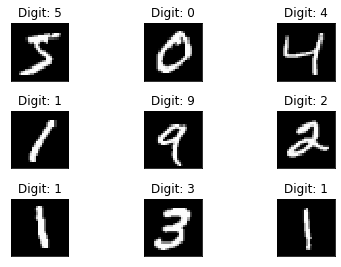

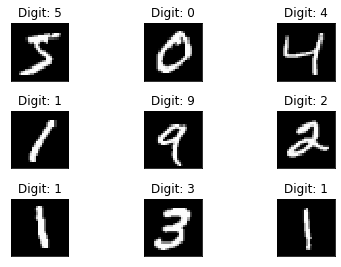

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
# converting & normalizing
X_train = x_train.reshape(60000, 784).astype('float32')/255
X_test  = x_test.reshape(10000, 784).astype('float32')/255

# hot encoding the labels
from keras.utils import np_utils
classes = 10
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)

In [ ]:
def softmax(x):
    expx = np.exp(x - np.max(x))
    return expx / expx.sum(axis = 0, keepdims = True)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

In [ ]:
class Dynamic_Layer:

    def __init__(self, weight_dim, id, isoutputLayer = False):
        self.weight = 2.5 * np.random.random(weight_dim) - 1
        self.delta = None
        self.A = None
        self.isoutputLayer = isoutputLayer # distinguishing output layer

    def forward_prop(self, x):
        z = np.dot(x, self.weight)    
        if self.isoutputLayer:
            self.A = softmax(z)             
        else:
            self.A = sigmoid(z)
            self.dZ = sigmoid_prime(z)
        return self.A
    
    def backward_prop(self, y, forward_layer):
        if self.isoutputLayer:
            error =  self.A - y
            self.delta = np.atleast_2d(error)
        else:
            self.delta = np.atleast_2d(forward_layer.delta.dot(forward_layer.weight.T) * self.dZ)
        return self.delta

    def update_function(self, alpha, back_input, lam, m):
        a = np.atleast_2d(back_input)
        d = np.atleast_2d(self.delta)
        ad = a.T.dot(d)
        # updating with L2 regularization term
        self.weight = self.weight - alpha * ad - lam * self.weight * alpha / m
        return self.weight

In [ ]:
class Neural_Network:

    def __init__(self, network):
        self.layers = []
        for i in range(1, len(network) - 1):
            weight_dim = (network[i - 1] + 1, network[i] + 1)
            self.layers.append(Dynamic_Layer(weight_dim, i))
        weight_dim = (network[i] + 1, network[i + 1])
        self.layers.append(Dynamic_Layer(weight_dim, len(network) - 1, True))

    def fit(self, X, y, alpha, max_iter, lam):
        # adding bias to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        cost = []
        for k in range(max_iter):
            i = np.random.randint(X.shape[0])
            a = X[i]
            # forward propagation
            for l in range(len(self.layers)):
                a = self.layers[l].forward_prop(a)
            # backward propagation
            delta = self.layers[-1].backward_prop(y[i], None)
            for l in range(len(self.layers) - 2, -1, -1):
                delta = self.layers[l].backward_prop(delta, self.layers[l+1])
            # updating weights
            a = X[i]
            m = a.shape[0]
            for layer in self.layers:
                layer.update_function(alpha, a, lam, m)
                a = layer.A             
            # cross entropy with L2 regularization
            cost.append(np.sum(-y * np.log(a)/len(y)) - lam * np.sum(a**2) / (2*m))
            # plotting cross-entropy
            plt.bar(k, cost[k])
            plt.title("Cross Entropy")
            plt.xlabel('Iterations')
         #   print(cost[k])

    def predict(self, x):
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((ones.T, x), axis=1)
        for l in range(0, len(self.layers)):
            a = self.layers[l].forward_prop(a)
        return a

**For Different Number of Hidden Layers**

Accuracy Score 0.1513
Accuracy Score 0.1009
Accuracy Score 0.101


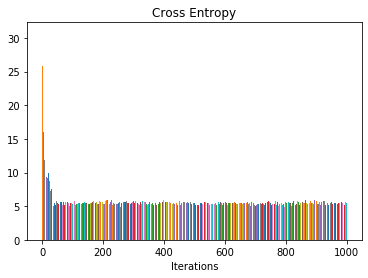

In [ ]:
if __name__ == '__main__':

    n = [[784, 350, 10], [784, 1200, 600, 10], [784, 520, 430, 280, 10]]
    for i in range(len(n)):
      net = Neural_Network(n[i])
      net.fit(X_train, y_train, alpha=0.01, max_iter=1000, lam=0.01)

      pred = net.predict(X_test)
      predictions = np.argmax(pred, axis=1)
      labels = np.argmax(y_test, axis=1)

      print("Accuracy Score", accuracy_score(predictions, labels))

**For different alpha values**

Accuracy Score 0.1358
Accuracy Score 0.3732
Accuracy Score 0.3588


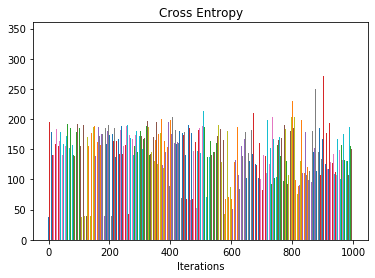

In [ ]:
if __name__ == '__main__':

    n = [0.01, 0.1, 0.5]
    for i in range(len(n)):
      net = Neural_Network([784, 350, 10])
      net.fit(X_train, y_train, alpha=n[i], max_iter=1000, lam=0.01)

      pred = net.predict(X_test)
      predictions = np.argmax(pred, axis=1)
      labels = np.argmax(y_test, axis=1)

      print("Accuracy Score", accuracy_score(predictions, labels))

**For different values of lambda**

Accuracy Score 0.3458
Accuracy Score 0.4048
Accuracy Score 0.4333
Accuracy Score 0.6047


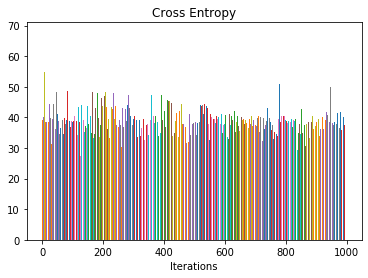

In [ ]:
if __name__ == '__main__':

    n = [0, 2, 5, 10]
    for i in range(len(n)):
      net = Neural_Network([784, 350, 10])
      net.fit(X_train, y_train, alpha=0.1, max_iter=1000, lam=n[i])

      pred = net.predict(X_test)
      predictions = np.argmax(pred, axis=1)
      labels = np.argmax(y_test, axis=1)

      print("Accuracy Score", accuracy_score(predictions, labels))

**Summary**

The configuration with the network 1 hidden layer worked best among all. Models with multiple hidden layers work better for the datasets that have so many features. 
I also get better result for the model with learning parameter, alpha = 0.1; it means the model reaches its gradient descent either too slow with smaller values of alpha and fulctuates highly with higher values of alpha.
For the regularization parameter, lambda = 5 provided the best result. For the rest of the values, the weight decay was more than optimum for the model. 